# CLT with REAL dice TESHEP 2024

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd

Let's read the excel spreadsheet in that contains the dice data you generated:

In [2]:
filename="/Users/phjhr/Dropbox/PGStats/NCP_ProblemSheet/DiceNCP2024.xlsx"  # <<<<<<<<< modify this
## replace the filename with the name OF your own downloaded Excel file
##         
dfall=pd.read_excel(filename)
#print(dfall[dfall["Roll a die once, submit the result"]>0])
#print(dfall["Roll a die once, submit the result"])

In [3]:
df=dfall[dfall["Roll a die once, submit the result"]>0]

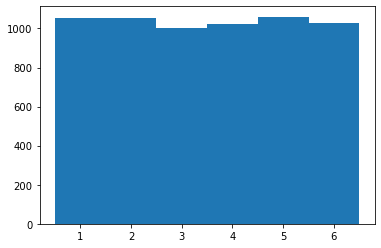

In [4]:
oneDieRandom =df["Roll a die once, submit the result"]
h=plt.hist(oneDieRandom, 6, range=(0.5, 6.5)) # make histogram
plt.show()

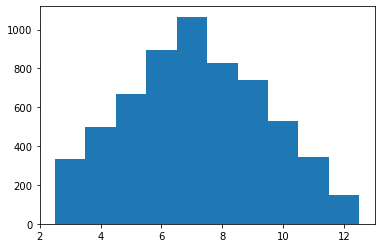

In [5]:
twoDiceRandom =df["Roll two dice (or one die twice), submit the sum of results"]
h=plt.hist(twoDiceRandom, 10, range=(2.5, 12.5)) # make histogram
plt.show()

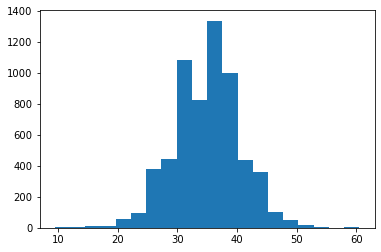

In [6]:
tenDiceRandom =df["Roll 10 dice, submit the sum of results"]
h=plt.hist(tenDiceRandom, 20, range=(9.5, 60.5)) # make histogram
plt.show()

Calulate arithmetic mean and std-dev

In [7]:
def meanAndStdev(sample):
    sum=0
    sumsq=0
    for x in sample:
        sum   += x
        sumsq += x**2
    N = len(sample)
    mean   = sum/N
    meansq = sumsq/N
    Variance = meansq - mean**2
    StandardDeviation = sqrt(Variance)
    return mean, Variance, StandardDeviation

In [8]:
mu, variance, sigma = meanAndStdev(oneDieRandom)
print("mean = ", mu, ", sigma = ", sigma)

mean =  3.493091259640103 , sigma =  1.71329027907142


Let's now compare this to a Gaussian of the same mean and standard deviation as the expected data.

We'll first need to be able to draw a Gaussian:

In [9]:
def gauss(x, mean, sigma):
    Del = (x-mean)/sigma
    return 1.0/(np.sqrt(2*pi)*sigma)  *  np.exp(-0.5*Del*Del)

Now let's put it all together in one neat function

In [10]:
def doAll(RandomDiceData, NDice=1, histoBins=-1, histoMin=999, histoMax=-999, showGauss=0, chi2=0, average=0):

    if average:
        RandomDiceData /= NDice  # RandomDice a numpy array so this means every element will be divided by NDice
    Nevents=len(RandomDiceData)
    mini=histoMin
    maxi=histoMax

    if(histoMax < histoMin):
        mini=NDice -0.5
        maxi=NDice*6 + 0.5
        if average:
            mini /= NDice
            maxi /= NDice
        if mini > min(RandomDiceData) : mini = min(RandomDiceData) - 0.5
        if maxi < max(RandomDiceData) : maxi = max(RandomDiceData) + 0.5
    bins=int(maxi - mini)
    if average: bins=int((maxi-mini)*NDice)
        
    if histoBins > 0 : bins=histoBins
    
    h=plt.hist(RandomDiceData, bins, range=(mini, maxi)) # make histogram

    mu, var, sigma = meanAndStdev(RandomDiceData)
    
    if showGauss:
        oversampling=10
        dx = (maxi-mini)/bins
        xArray=np.arange(mini, maxi, dx/oversampling)
        plt.plot(xArray,gauss(xArray, mu, sigma)*dx*Nevents)

    plt.show()
    
    print("For ", NDice, " random numbers added ", Nevents, " times:")
    print("mean = ", mu, ", variance = ", var, ", sigma = ", sigma)
    
    if chi2:
        N=fsum(h[0])
        chi2sum=0
        for Nbin, bin_low, bin_up in zip(h[0], h[1], h[1][1:]):
            ##print(Nbins, ", ", bin_low, ", ", bin_up)
            binCentre=0.5*(bin_low + bin_up)
            binWidth= bin_up - bin_low
            theory=N*binWidth*gauss(binCentre, mu, sigma)
            measured=Nbin
            error_squared=theory
            chi2sum += (theory-measured)**2/error_squared
        Nbins=len(h[0])
        print("chi2 = ", chi2sum, " for ", Nbins, " bins; chi2/bin = ", chi2sum/Nbins)


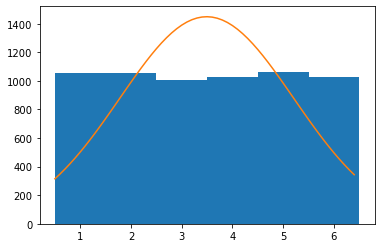

For  1  random numbers added  6224  times:
mean =  3.493091259640103 , variance =  2.935363580360624 , sigma =  1.71329027907142
chi2 =  1381.775603874553  for  6  bins; chi2/bin =  230.29593397909218


In [11]:
doAll(oneDieRandom, 1, showGauss=1, chi2=1)

###### Let's try the distribuitons for 2 and 3 dice and see if mean and variance are both proportional to the number of dice, as expected, and let's also compare it to a Gaussian

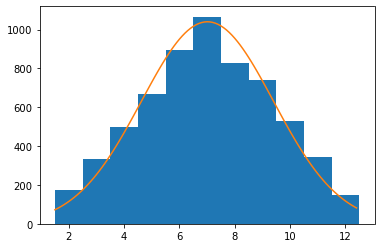

For  2  random numbers added  6224  times:
mean =  7.013014138817481 , variance =  5.700184102627851 , sigma =  2.3875058330039427
chi2 =  126.01933000891943  for  11  bins; chi2/bin =  11.456302728083584


In [12]:
doAll(twoDiceRandom,   2, showGauss=1, chi2=1)

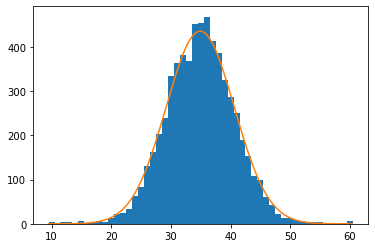

For  10  random numbers added  6224  times:
mean =  34.91002570694087 , variance =  32.54749588622872 , sigma =  5.705041269458856
chi2 =  1744.741865410267  for  51  bins; chi2/bin =  34.21062481196602


In [13]:
doAll(tenDiceRandom, 10, showGauss=1, histoMin=9.5, histoMax=60.5, histoBins=51, chi2=1)

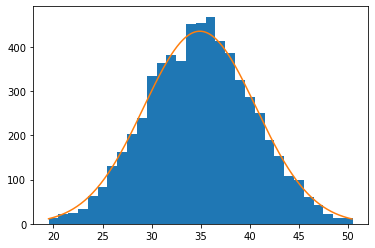

For  10  random numbers added  6224  times:
mean =  34.91002570694087 , variance =  32.54749588622872 , sigma =  5.705041269458856
chi2 =  37.09426743242072  for  31  bins; chi2/bin =  1.1965892720135716


In [14]:
doAll(tenDiceRandom, 10, showGauss=1, histoMin=19.5, histoMax=50.5, histoBins=31, chi2=1)

With the code below we can look at individual contribuitons:

In [15]:
def NamedDice(name, dataframe, chi2=0):
    dfName=dataframe[dataframe["Name"]==name]
    oneDieRandomName =dfName["Roll a die once, submit the result"]
    twoDiceRandomName =dfName["Roll two dice (or one die twice), submit the sum of results"]
    tenDiceRandomName =dfName["Roll 10 dice, submit the sum of results"]

    doAll(oneDieRandomName,  1, showGauss=1, chi2=chi2)
    doAll(twoDiceRandomName,   2, showGauss=1, chi2=chi2)
    doAll(tenDiceRandomName,   10, showGauss=1, chi2=chi2)

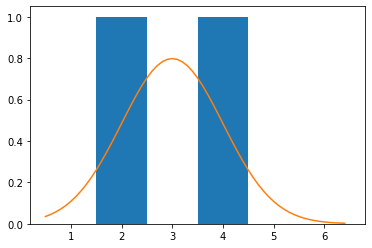

For  1  random numbers added  2  times:
mean =  3.0 , variance =  1.0 , sigma =  1.0
chi2 =  2.1233263758785603  for  6  bins; chi2/bin =  0.35388772931309337


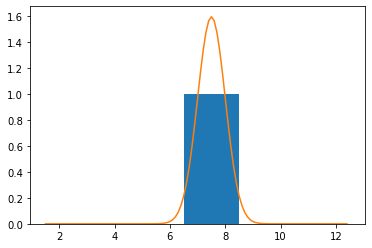

For  2  random numbers added  2  times:
mean =  7.5 , variance =  0.25 , sigma =  0.5
chi2 =  0.03759815433909298  for  11  bins; chi2/bin =  0.0034180140308266342


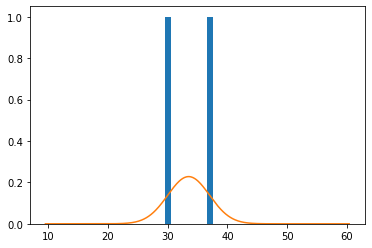

For  10  random numbers added  2  times:
mean =  33.5 , variance =  12.25 , sigma =  3.5
chi2 =  12.46455973942272  for  51  bins; chi2/bin =  0.24440313214554352


In [16]:
NamedDice("Jonas", df, chi2=1)